##Loading data

In [79]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [80]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [81]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [82]:
y_train.shape

(50000, 1)

In [83]:
X_train.shape

(50000, 32, 32, 3)

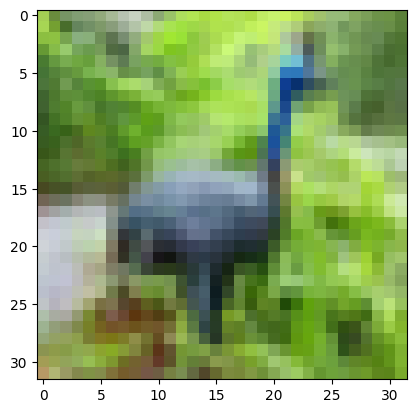

In [84]:
plt.imshow(X_train[6])

Consider only 10000 rows

In [85]:
X_train1=X_train[:10000]
y_train1=y_train[:10000]

In [86]:
X_train1.shape

(10000, 32, 32, 3)

In [87]:
y_train1.shape

(10000, 1)

In [88]:
X_test1=X_test[:1000]
y_test1=y_test[:1000]

##Using InceptionV3

Resizing images

In [89]:
from tensorflow.keras.utils import img_to_array,array_to_img
from PIL import Image

In [90]:
def resize_image(images):
  resized_img=[]
  for image in images:
    image=img_to_array(image)
    image=Image.fromarray(image.astype('uint8'))
    image=image.resize((75, 75))
    image=img_to_array(image)
    resized_img.append(image)
  return np.array(resized_img)

In [91]:
X_train1=resize_image(X_train1)

In [92]:
X_test1=resize_image(X_test1)

In [93]:
X_train1.shape

(10000, 75, 75, 3)

In [94]:
X_test1.shape

(1000, 75, 75, 3)

Normalizing images

In [95]:
X_train1=X_train1.astype('float32') / 255
X_test1=X_test1.astype('float32') / 255

Categorical for y

In [96]:
from tensorflow.keras.utils import to_categorical

In [97]:
y_test1 = to_categorical(y_test1,num_classes =10)
y_train1 = to_categorical(y_train1,num_classes =10)

In [98]:
y_train1.shape

(10000, 10)

InceptionV3

In [99]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [100]:
base_model=InceptionV3(weights="imagenet",include_top=False,input_shape=(75,75,3))     #include_top indicates output of cnn(inceptionv3)

######the layers from basemodel are already trained and should not be further trained, instead the base model layers should be freezed

In [101]:
for layer in base_model.layers:
  layer.trainable=False

Neural network with base_model ahead

In [102]:
from tensorflow.keras.models import Sequential

In [103]:
model=Sequential()

In [104]:
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [105]:
model.add(base_model)

output of CNN must be flattened before giving it to ANN

In [106]:
model.add(Flatten())

In [107]:
model.add(Dense(200,activation='relu'))

In [108]:
model.add(Dense(100,activation='relu'))

In [109]:
#model.add(Dense(60,activation='relu'))

In [110]:
model.add(Dropout(0.3))

In [111]:
model.add(Dense(10,activation='softmax'))

Training the model

In [112]:
from tensorflow.keras.optimizers import Adam
adam=Adam(lr=0.0001)

In [113]:
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [114]:
X_train1.shape,y_train1.shape

((10000, 75, 75, 3), (10000, 10))

In [115]:
history = model.fit(X_train1,y_train1,batch_size = 32, epochs = 10, validation_data = (X_test1,y_test1) )

Epoch 1/10
313/313 [==============================] - 24s 29ms/step - loss: 1.5710 - accuracy: 0.4452 - val_loss: 1.2746 - val_accuracy: 0.5720
Epoch 2/10
313/313 [==============================] - 5s 17ms/step - loss: 1.1397 - accuracy: 0.5986 - val_loss: 1.1657 - val_accuracy: 0.6130
Epoch 3/10
313/313 [==============================] - 6s 19ms/step - loss: 0.9595 - accuracy: 0.6691 - val_loss: 1.1622 - val_accuracy: 0.6180
Epoch 4/10
313/313 [==============================] - 6s 18ms/step - loss: 0.8038 - accuracy: 0.7212 - val_loss: 1.2900 - val_accuracy: 0.5720
Epoch 5/10
313/313 [==============================] - 6s 20ms/step - loss: 0.6589 - accuracy: 0.7722 - val_loss: 1.2998 - val_accuracy: 0.5840
Epoch 6/10
313/313 [==============================] - 5s 17ms/step - loss: 0.5160 - accuracy: 0.8254 - val_loss: 1.5025 - val_accuracy: 0.5950
Epoch 7/10
313/313 [==============================] - 6s 19ms/step - loss: 0.3983 - accuracy: 0.8597 - val_loss: 1.6005 - val_accuracy: 0.572

We got a maximum accuracy of 60% at epoch 9 using InceptionV3. 
Let us try using simple CNN.

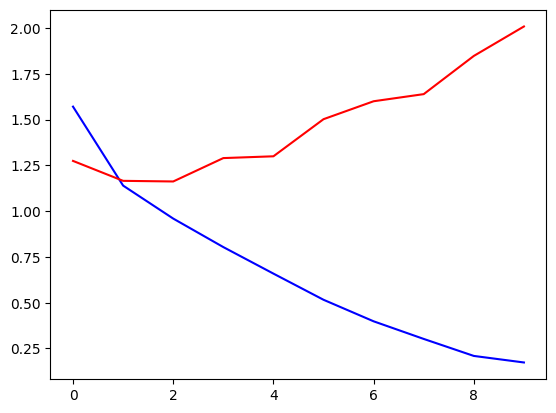

In [116]:
plt.plot(history.history['loss'],c = 'b')
plt.plot(history.history['val_loss'],c = 'r')

Prediction


In [117]:
lab=model.predict(X_test1[26].reshape((1,75,75,3)))

1/1 [==============================] - 2s 2s/step


In [118]:
print(np.argmax(lab))

4


In [119]:
y_test[26][0]

4

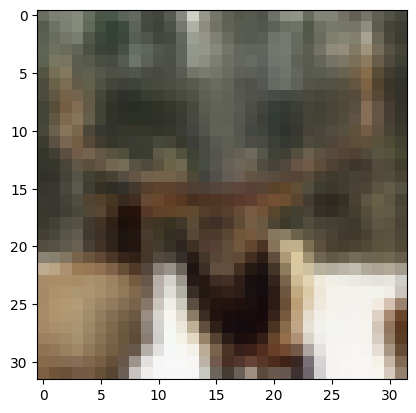

In [120]:
plt.imshow(X_test[26])

##Using only CNN

In [121]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation 

In [122]:
X_train.shape

(50000, 32, 32, 3)

In [133]:
y_train.shape

(50000, 1)

In [134]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [135]:
y_test.shape

(10000, 1)

In [136]:
X_test.shape

(10000, 32, 32, 3)

In [123]:
X_train=X_train / 255.0
X_test=X_test / 255.0

In [124]:
model1=Sequential()

In [125]:
model1.add(Conv2D(32,(3,3),input_shape=(32,32,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

In [126]:
model1.add(Conv2D(32,(3,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

In [127]:
model1.add(Flatten())

In [128]:
model1.add(Dense(70,activation="relu"))

In [129]:
model1.add(Dense(10,activation="softmax"))

In [130]:
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [131]:
history1=model1.fit(X_train,y_train,epochs=25,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/25
1563/1563 [==============================] - 11s 5ms/step - loss: 1.5073 - accuracy: 0.4569 - val_loss: 1.2656 - val_accuracy: 0.5436
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1818 - accuracy: 0.5849 - val_loss: 1.1040 - val_accuracy: 0.6103
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0422 - accuracy: 0.6353 - val_loss: 1.0039 - val_accuracy: 0.6487
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9627 - accuracy: 0.6639 - val_loss: 0.9873 - val_accuracy: 0.6552
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9022 - accuracy: 0.6837 - val_loss: 0.9560 - val_accuracy: 0.6702
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8489 - accuracy: 0.7044 - val_loss: 0.9292 - val_accuracy: 0.6813
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8110 - accuracy: 0.7172 - val_loss: 0.9245 - val_accuracy

Here, at the epoch 18 we got a validation accuracy of 69% which significantly large than what we got using InceptionV3

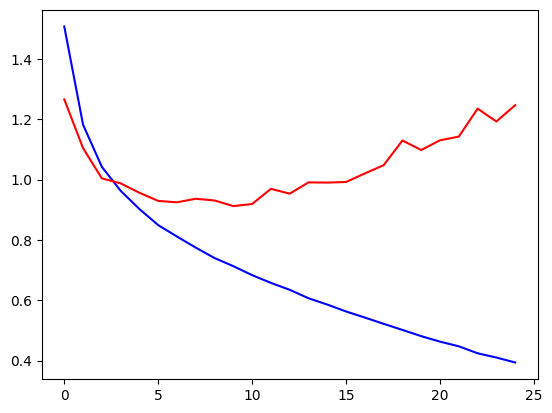

In [132]:
plt.plot(history1.history['loss'],c = 'b')
plt.plot(history1.history['val_loss'],c = 'r')